In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.isna()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


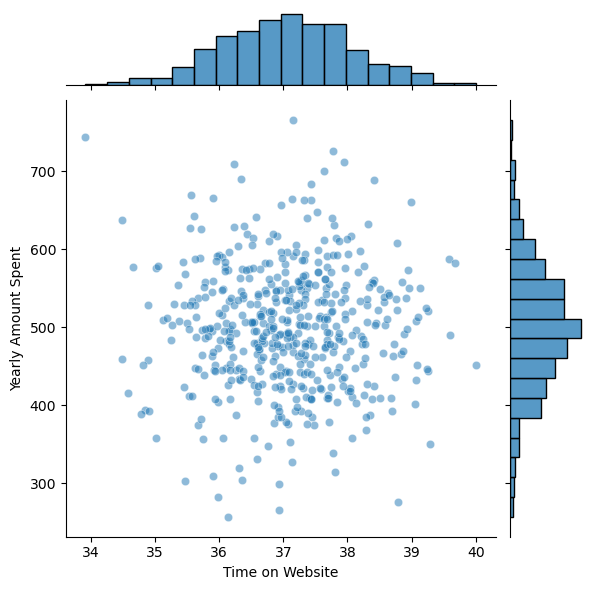

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,alpha=0.5)
plt.show()

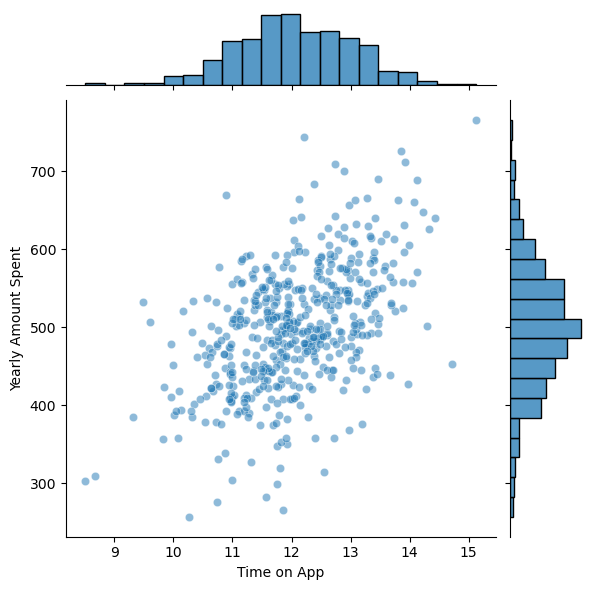

In [8]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent',alpha=0.5)
plt.show()

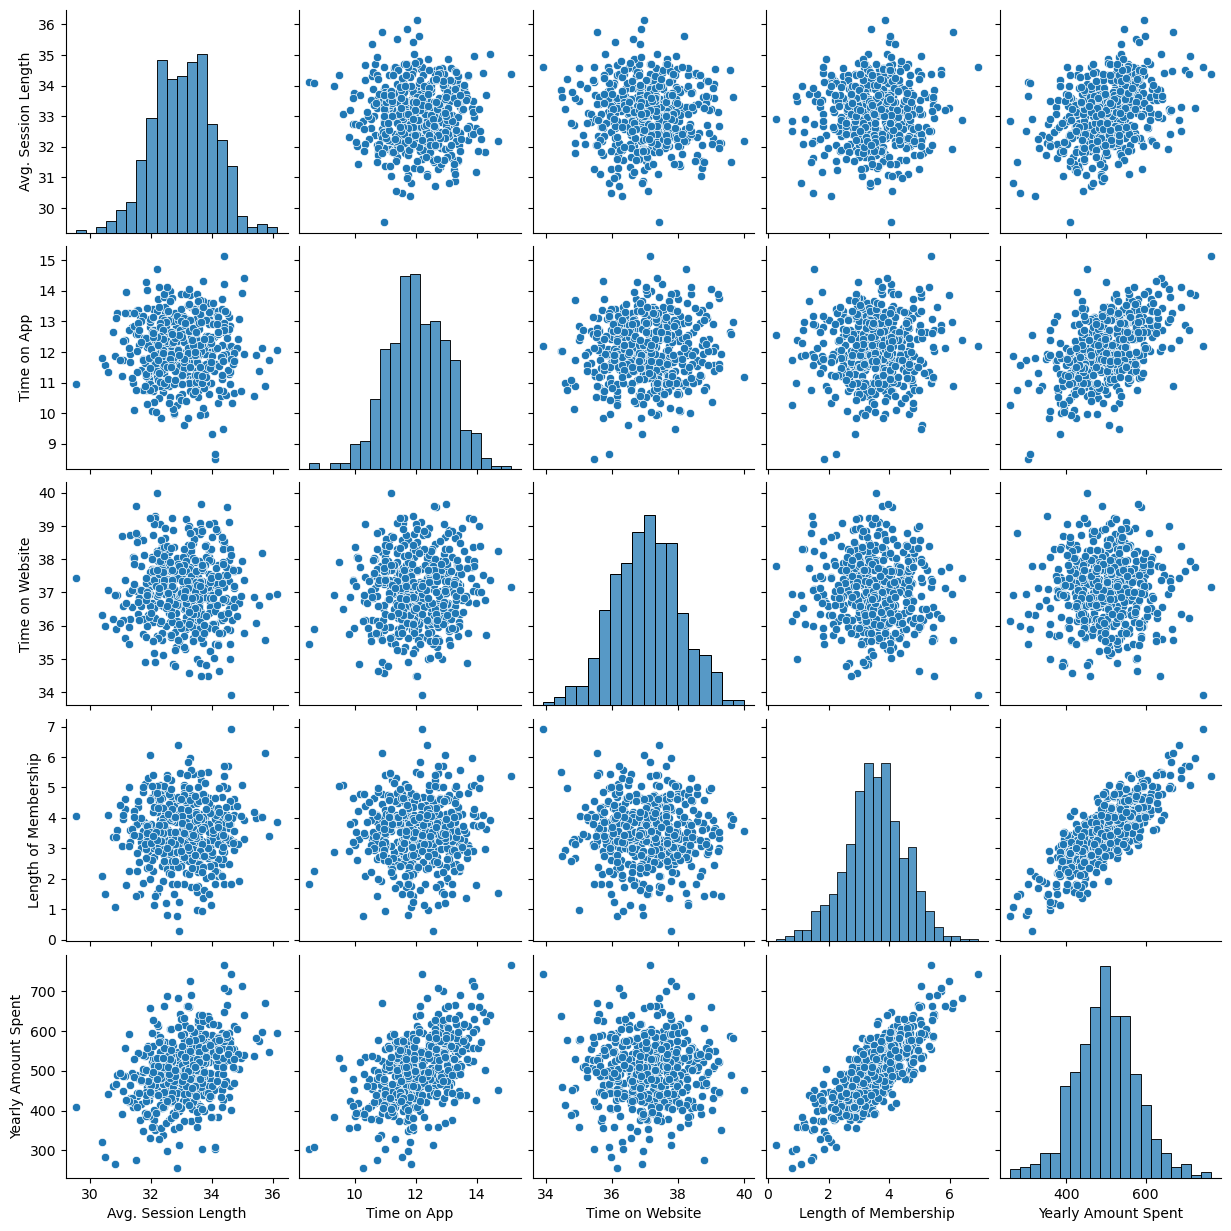

In [9]:
sns.pairplot(data=df,kind='scatter')
plt.show()

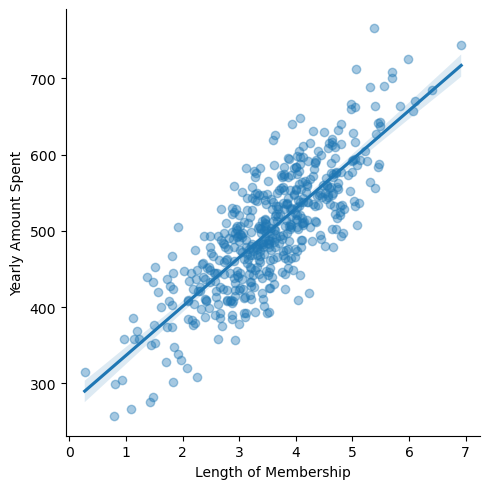

In [10]:
sns.lmplot(df,x='Length of Membership',y='Yearly Amount Spent',scatter_kws={'alpha':0.4})
plt.show()

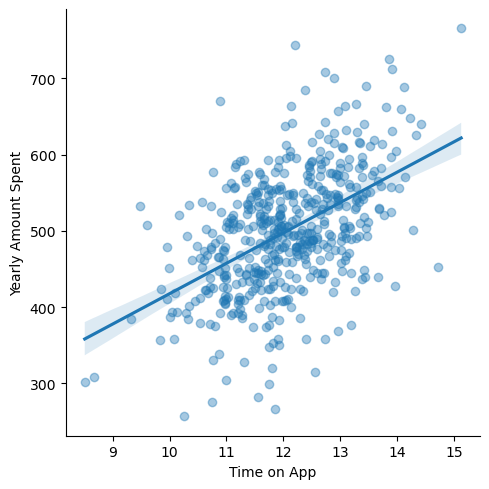

In [11]:
sns.lmplot(df,x='Time on App',y='Yearly Amount Spent',scatter_kws={'alpha':0.4})
plt.show()

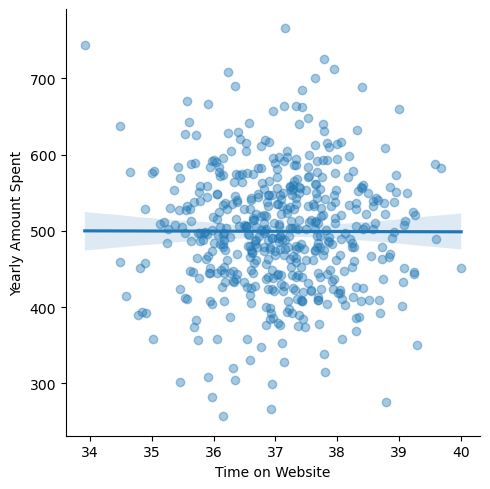

In [12]:
sns.lmplot(df,x='Time on Website',y='Yearly Amount Spent',scatter_kws={'alpha':0.4})
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df[['Time on App','Length of Membership','Time on Website','Avg. Session Length']]
y=df['Yearly Amount Spent']

In [15]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
X_train

,Time on App,Length of Membership,Time on Website,Avg. Session Length
5,12.026925,5.493507,34.476878,33.871038
116,12.011022,2.753424,36.701052,33.925795
45,12.170525,3.663105,39.131097,34.555768
16,11.733862,3.136133,34.894093,32.125387
462,11.233415,2.320550,37.211153,33.503810
...,...,...,...,...
106,12.190474,3.781823,36.152462,32.291756
270,12.956277,3.275734,38.655095,34.006489
348,10.886921,3.128639,34.897828,31.812483
435,14.132893,3.762070,37.023479,32.259973


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm=LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
lm.intercept_

-1050.6536746645725

In [20]:
lm.coef_

array([38.59713548, 61.67473243,  0.45914788, 25.72425621])

In [21]:
predictions=lm.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

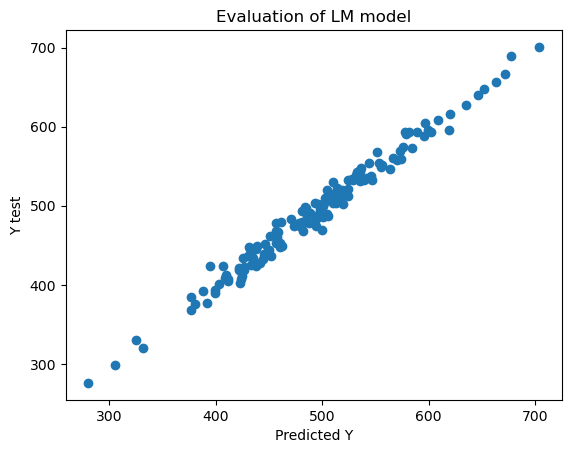

In [22]:
plt.scatter(predictions, y_test)
plt.xlabel('Predicted Y')
plt.ylabel('Y test')
plt.title('Evaluation of LM model')
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
import math

In [33]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Square Error:', mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', math.sqrt(mean_squared_error(y_test, predictions)))
print('R^2:', explained_variance_score(y_test, predictions))

Mean Absolute Error: 8.426091641432125
Mean Square Error: 103.91554136503349
Root Mean Square Error: 10.193897260863162
R^2: 0.9812611651910702


In [27]:
residuals= y_test- predictions

C:\Users\admin\AppData\Local\Temp\ipykernel_56604\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

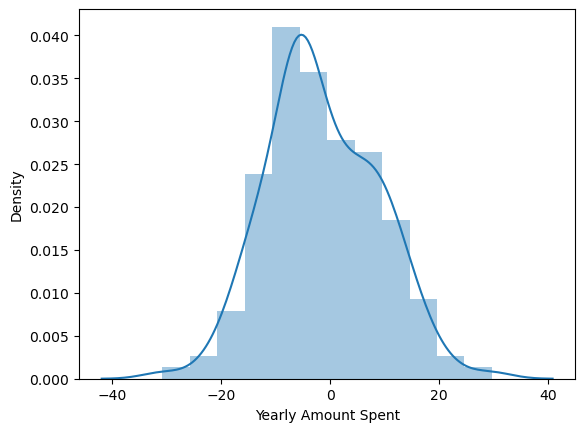

In [30]:
sns.distplot(residuals)